In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns


In [2]:
data = pd.read_csv('AB_NYC_2019.csv')

# Data Exploration and Cleaning

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
data.shape

(48895, 16)

In [5]:
data.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


In [6]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [7]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

There are null values in 'id','host_name','last_review', and 'reviews_per_month' columns. However, the first three are not important in our analysis, we can just drop them.

In [8]:
data.drop(['id','host_name','last_review'], axis=1, inplace=True)

We replace the missing values with the mean of the coloumns mean repectively

In [9]:
data.fillna(data.mean(), inplace = True)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0
5,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.590000,1,129
6,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.400000,1,0
7,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.470000,1,220
8,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.990000,1,0
9,Cute & Cozy Lower East Side 1 bdrm,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.330000,4,188


Let's explore the neighborhood types in NYC Airbnb

In [10]:
data.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [11]:
data.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

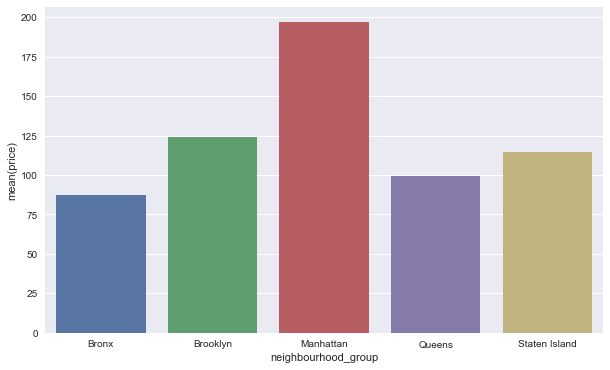

In [12]:
avg_=data.groupby('neighbourhood_group',as_index=False)['price'].mean()
plt.figure(figsize=(10,6))
sns.barplot(avg_['neighbourhood_group'], avg_['price'])

From the graph above, we know Manhattan has the highest price in general.

In [13]:
data.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

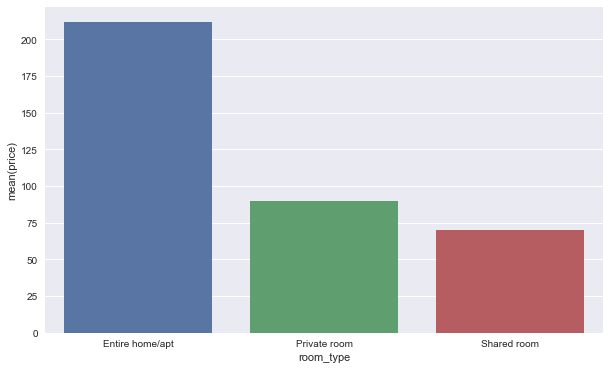

In [14]:
avg_=data.groupby('room_type',as_index=False)['price'].mean()
plt.figure(figsize=(10,6))
sns.barplot(avg_['room_type'], avg_['price'])

It is not surprising that 'Entire home/apt' has the highest price in general. In the following, let's explore what determine the price of Airbnb housing in NYC.

# Regression Analysis Scikit-Learn

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

It is very possible that the variables "neighbouthourhood_group" and "room_type" would affect "price". In order to use the regression model, let's try using label encoding method in this case.

In [16]:
# data_onehot = pd.get_dummies(data, columns=['room_type','neighbourhood_group'], prefix = ['room_type','neighbourhood_group'])
# data_onehot.head()

data_label = LabelEncoder()
data['room_type_code'] = data_label.fit_transform(data['room_type'])
data['neighbourhood_group_code'] = data_label.fit_transform(data['neighbourhood_group'])

data.head()


,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_code,neighbourhood_group_code
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365,1,1
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355,0,2
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365,1,2
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194,0,1
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0,0,2


**Step 1: Split the data into training set and test set**

In [17]:
Y = data['price']
X = data[['neighbourhood_group_code', 'room_type_code', 'number_of_reviews']]

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.2)

Fitting the multiple Linear Regression into the training set

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

/Users/samfeng/anaconda/lib/python3.6/site-packages/sklearn/linear_model/base.py:539: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
Y_pred = regressor.predict(X_test)
print(Y_pred)

[107.61133714 190.83361825 108.36867463 ... 231.27413785  42.12732298
  95.14094726]


In [21]:
error_frame = pd.DataFrame({'Actual': np.array(Y_test).flatten(), 'Predicted': Y_pred.flatten()})
error_frame.head(10)

,Actual,Predicted
0,88,107.611337
1,379,190.833618
2,145,108.368675
3,100,108.873566
4,86,108.873566
5,450,201.284441
6,189,215.521952
7,60,95.846927
8,260,216.026844
9,97,108.368675


From the above chart, we can see that the model accuracy is not very good. We need to evaluate the variables we put into the model probably.Now let's see if we can modify the model by using backward elimination.

In [22]:
import statsmodels.formula.api as sm
X = np.append(arr = np.ones((48895, 1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0,1,2,3]]
regressor_ols = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     1152.
Date:                Wed, 04 Sep 2019   Prob (F-statistic):               0.00
Time:                        12:20:21   Log-Likelihood:            -3.3572e+05
No. Observations:               48895   AIC:                         6.714e+05
Df Residuals:                   48891   BIC:                         6.715e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        191.7691      2.849     67.300      0.000     186.184     197.354
x1            13.1752      1.427      9.235      0.000      10.379      15.972
x2          -109.4522      1.925    -56.862      0.000    -113.225    -105.679
x3            -0.2557      0.024    -10.852      0.000      -0.302      -0.210
==============================================================================
Omnibus:                   108740.946   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        887241126.797
Skew:                          20.707   Prob(JB):                         0.00
Kurtosis:                     661.624   Cond. No.                         153.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Unfortunately, based on the above p-values of all variables, all of them seem to be good. However, the R-square value is not very high, meaning the the correlation between dependent and independent variables is not very high. It indicates that we will need to change our methods to evaluate those variables.

**Let's see if decision tree regression can have a better estimate**

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier


Reg_tree=DecisionTreeClassifier()
Reg_tree.fit(X_train, Y_train)
Predict_tree = Reg_tree.predict(X_test)
print(Predict_tree)
print(Y_test)

[100  75 100 ... 150  45  50]
29401     88
48496    379
37375    145
45011    100
40667     86
4569     450
8131     189
18934     60
35525    260
1632      97
45633    105
30804     45
40598     61
4070      99
16524     60
34544    253
8056      80
31476    125
47586    189
26316    199
2642     160
34916    170
41479    235
35701    180
24979     85
21679    110
44027     59
40894    250
1967     100
19974     76
        ... 
18920    250
7173     249
39014    109
36951     35
31052    274
28        44
11233    145
32320    150
45057    215
20184     90
6163      69
20060    280
40305    110
2550     300
3240     750
35284    200
14678    220
2377      89
34886    100
43586     51
21769     85
48095     69
21937    122
34689    450
25007     65
29873    100
9540      64
28088     45
9574      58
28436     75
Name: price, Length: 9779, dtype: int64


In [31]:
error_frame_Decision = pd.DataFrame({'Actual': np.array(Y_test).flatten(), 'Predicted': Predict_tree.flatten()})
error_frame_Decision.head(20)

,Actual,Predicted
0,88,100
1,379,75
2,145,100
3,100,100
4,86,100
5,450,150
6,189,150
7,60,43
8,260,200
9,97,100


In [32]:
print("Accuracy:",metrics.accuracy_score(Y_test, Predict_tree))


Accuracy: 0.06227630637079456


Still, the accuracy of this model is not very high. Let's see what can the description of this dataset look like.

In [34]:
data.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_code,neighbourhood_group_code
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327,0.504060,1.675345
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.497775,32.952519,131.622289,0.545379,0.735816
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.280000,1.000000,0.000000,0.000000,1.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.220000,1.000000,45.000000,0.000000,2.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000,1.000000,2.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,2.000000,4.000000


From the above chart, it is surprising that the minimum of price is 0, while the maximum is 10,000. There might be some irregularities in this variables.

# More Data Exploration

**Let's first check the distribution of Airbnb price in NYC.**

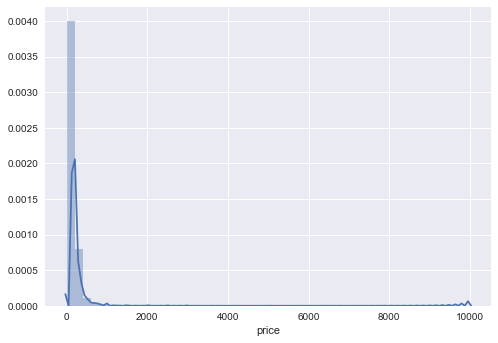

In [35]:
sns.distplot(data.price, bins=50)

From the above, we can see that the distribution of price is heavily left skewed. Most of the properties price are between 0 - 2000. Most importantly, it is not very possible that prices of some Airbnb housing are 0, meaning some people just gave away their properties for free.

In [37]:
free_housing = data.loc[data.price <= 0]
print(free_housing.shape)
free_housing.head()

(11, 15)


,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_code,neighbourhood_group_code
23161,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,0.05,4,28,1,1
25433,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2.56,4,127,1,0
25634,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,0.71,5,0,1,1
25753,"Sunny, Quiet Room in Greenpoint",1641537,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,0.53,2,0,1,1
25778,Modern apartment in the heart of Williamsburg,10132166,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,0.15,1,73,0,1


There are 11 lists have 0 pricing, which can be an error in this dataset. However, it can be one of the reasons that contribute to low accuracy of my previous model. In order to build a more accurant model to analysis price, these kind of data will need to be cleaned up.